In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

import nltk

from langdetect import detect

%matplotlib inline

In [3]:
df = pd.read_csv('data/online_ship_listing_data.csv')

In [4]:
df.head()

,Unnamed: 0,name,price,location,offerer,id,description,year,manufacturer,model,category,length,fuel_type,hull_material,hull_shape,country
0,0,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,24500.0,"dinteloord, niederlande",Sealion Yachts,8222682,General: The Zeegrundel was originally designe...,1976,Ketch,Baarda Zeegrundel,Lastkahnsegelboote,900.00,diesel,steel,NaN,netherlands
1,1,1979 Dufour 28001979 Dufour 2800,9900.0,"greifswald, deutschland",Privater Verkäufer,8457402,Selling a well-preserved and equipped sailing ...,1979,Dufour,2800,Segelboote mit Kajüte,83.00,diesel,GFK / fiberglas / polyester,NaN,germany
2,2,2010 Van der Graaf Classic Schooner2010 Van de...,12000000.0,"contact de valk antibes, frankreich",De Valk Group B.V,7936534,Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...,2010,Van der Graaf,Classic Schooner,Slup Boote,65.84,diesel,steel,NaN,france
3,3,2010 Custom Van Der Graaf BV Schooner2010 Cust...,12000000.0,"imperia, italien",Bernard Gallay Yacht Brokerage,6751543,Price On Application\n \nThe current ATLANTIC ...,2010,Custom,Van Der Graaf BV Schooner,Schoner,64.50,diesel,steel,NaN,italy
4,4,2008 Custom Build Gulet2008 Custom Build Gulet,5000000.0,türkei,Gino Group,469955,A beautiful 43m Gulet classic luxury style bui...,2008,Custom Build,Gulet,Segelyachten,42.98,diesel,wood,NaN,turkey


In [5]:
df.shape

(1850, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1850 non-null   int64  
 1   name           1850 non-null   object 
 2   price          1850 non-null   float64
 3   location       1850 non-null   object 
 4   offerer        1850 non-null   object 
 5   id             1850 non-null   int64  
 6   description    1850 non-null   object 
 7   year           1850 non-null   int64  
 8   manufacturer   1850 non-null   object 
 9   model          1843 non-null   object 
 10  category       1850 non-null   object 
 11  length         1850 non-null   float64
 12  fuel_type      1735 non-null   object 
 13  hull_material  1850 non-null   object 
 14  hull_shape     402 non-null    object 
 15  country        1850 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 231.4+ KB


In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [9]:
df.describe()

,price,id,year,length
count,1.850000e+03,1.850000e+03,1850.000000,1850.000000
mean,2.476051e+05,8.139325e+06,1995.788649,13.340205
std,6.058929e+05,9.206349e+05,21.649481,21.341712
min,1.500000e+01,4.692560e+05,1850.000000,2.500000
25%,3.950000e+04,8.196685e+06,1983.000000,9.740000
50%,9.500000e+04,8.404736e+06,1999.500000,11.820000
75%,2.490000e+05,8.455602e+06,2011.000000,14.625000
max,1.200000e+07,8.522261e+06,2024.000000,900.000000


# Outliers

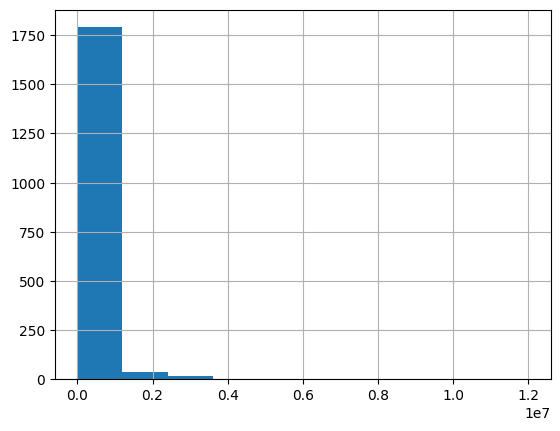

In [10]:
df.price.hist()
plt.show();

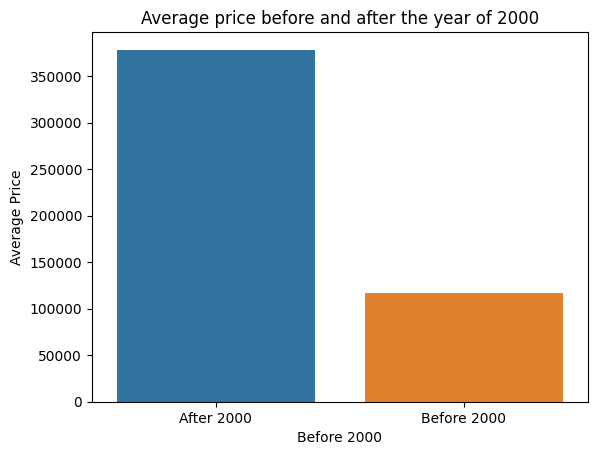

In [11]:
df['before_2000'] = df['year'] < 2000
avg_prices = df.groupby('before_2000')['price'].mean().reset_index()

sns.barplot(x='before_2000', y='price', data=avg_prices)
plt.xlabel('Before 2000')
plt.ylabel('Average Price')
plt.title('Average price before and after the year of 2000')
plt.xticks([0, 1], ['After 2000', 'Before 2000'])
plt.show();

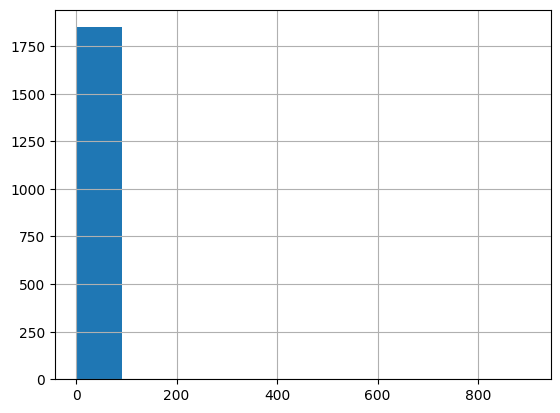

In [12]:
df.length.hist()
plt.show();

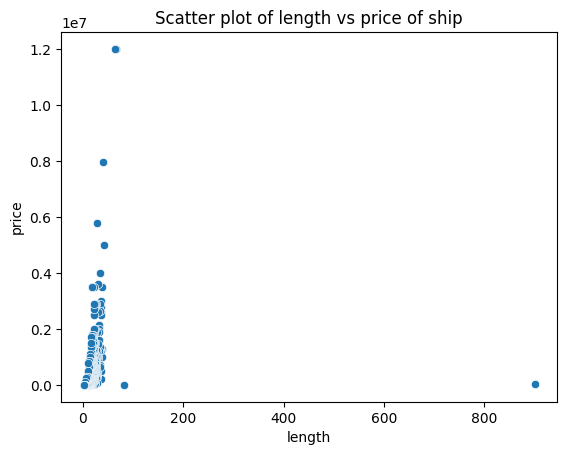

In [13]:
sns.scatterplot(x=df['length'], y=df['price'], data = df)
plt.title('Scatter plot of length vs price of ship')
plt.show();

In [14]:
df[df['price'] == df.price.max()]

,name,price,location,offerer,id,description,year,manufacturer,model,category,length,fuel_type,hull_material,hull_shape,country,before_2000
2,2010 van der graaf classic schooner2010 van de...,12000000.0,"contact de valk antibes, frankreich",de valk group b.v,7936534,model: van der graaf classic schooner type: sa...,2010,van der graaf,classic schooner,slup boote,65.84,diesel,steel,NaN,france,False
3,2010 custom van der graaf bv schooner2010 cust...,12000000.0,"imperia, italien",bernard gallay yacht brokerage,6751543,price on application\n \nthe current atlantic ...,2010,custom,van der graaf bv schooner,schoner,64.50,diesel,steel,NaN,italy,False


In [15]:
df[df['length'] == df.length.max()]

,name,price,location,offerer,id,description,year,manufacturer,model,category,length,fuel_type,hull_material,hull_shape,country,before_2000
0,1976 ketch baarda zeegrundel1976 ketch baarda ...,24500.0,"dinteloord, niederlande",sealion yachts,8222682,general: the zeegrundel was originally designe...,1976,ketch,baarda zeegrundel,lastkahnsegelboote,900.0,diesel,steel,NaN,netherlands,True


There are outliers in price and length

In [16]:
def clip_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    upper_threshold = q3 + (1.5 * (q3 - q1))
    df[col] = df[col].clip(upper=upper_threshold)

In [17]:
for col in ['price', 'length']:
    clip_outliers(df, col)

In [18]:
df.describe()

,price,id,year,length
count,1850.000000,1.850000e+03,1850.000000,1850.000000
mean,169987.085405,8.139325e+06,1995.788649,12.485593
std,175469.631782,9.206349e+05,21.649481,3.964729
min,15.000000,4.692560e+05,1850.000000,2.500000
25%,39500.000000,8.196685e+06,1983.000000,9.740000
50%,95000.000000,8.404736e+06,1999.500000,11.820000
75%,249000.000000,8.455602e+06,2011.000000,14.625000
max,563250.000000,8.522261e+06,2024.000000,21.952500


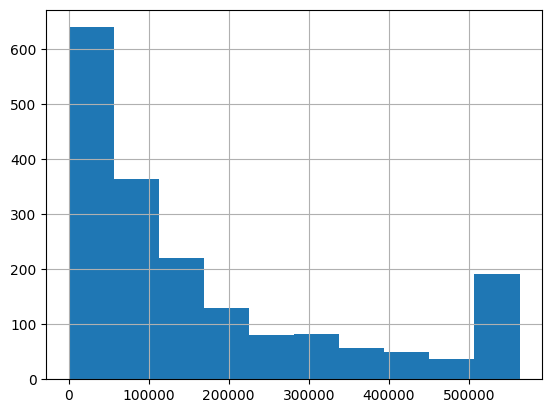

In [19]:
df.price.hist()
plt.show();

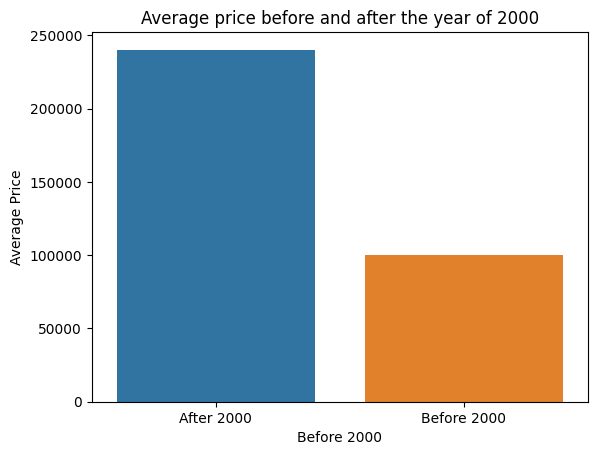

In [20]:
df['before_2000'] = df['year'] < 2000
avg_prices = df.groupby('before_2000')['price'].mean().reset_index()

sns.barplot(x='before_2000', y='price', data=avg_prices)
plt.xlabel('Before 2000')
plt.ylabel('Average Price')
plt.title('Average price before and after the year of 2000')
plt.xticks([0, 1], ['After 2000', 'Before 2000'])
plt.show();

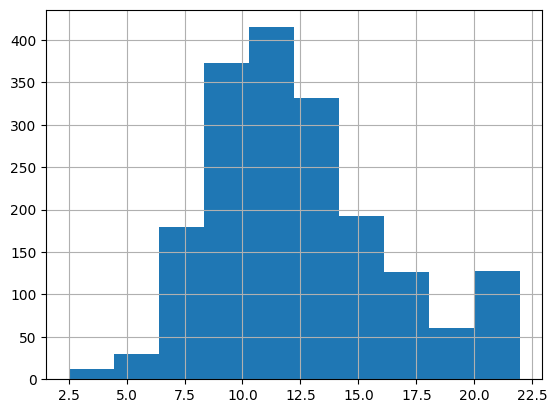

In [21]:
df.length.hist()
plt.show()

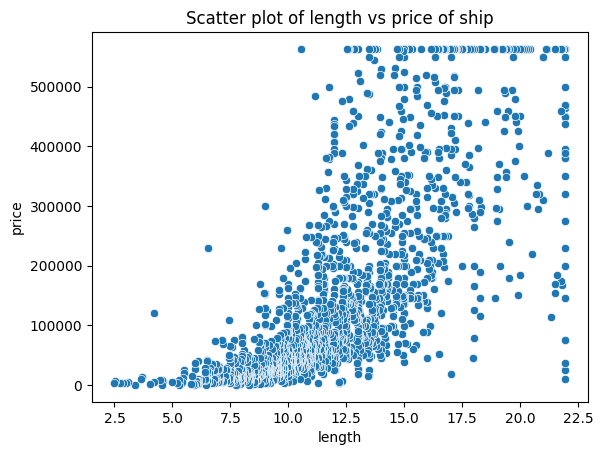

In [22]:
sns.scatterplot(x=df['length'], y=df['price'], data = df)
plt.title('Scatter plot of length vs price of ship')
plt.show();

# EDA

1. Avg Price by Country
2. Avg Price by Manufacturer
3. Avg Price by Fuel Type
4. Avg Price by Category

In [23]:
df.head()

,name,price,location,offerer,id,description,year,manufacturer,model,category,length,fuel_type,hull_material,hull_shape,country,before_2000
0,1976 ketch baarda zeegrundel1976 ketch baarda ...,24500.0,"dinteloord, niederlande",sealion yachts,8222682,general: the zeegrundel was originally designe...,1976,ketch,baarda zeegrundel,lastkahnsegelboote,21.9525,diesel,steel,NaN,netherlands,True
1,1979 dufour 28001979 dufour 2800,9900.0,"greifswald, deutschland",privater verkäufer,8457402,selling a well-preserved and equipped sailing ...,1979,dufour,2800,segelboote mit kajüte,21.9525,diesel,gfk / fiberglas / polyester,NaN,germany,True
2,2010 van der graaf classic schooner2010 van de...,563250.0,"contact de valk antibes, frankreich",de valk group b.v,7936534,model: van der graaf classic schooner type: sa...,2010,van der graaf,classic schooner,slup boote,21.9525,diesel,steel,NaN,france,False
3,2010 custom van der graaf bv schooner2010 cust...,563250.0,"imperia, italien",bernard gallay yacht brokerage,6751543,price on application\n \nthe current atlantic ...,2010,custom,van der graaf bv schooner,schoner,21.9525,diesel,steel,NaN,italy,False
4,2008 custom build gulet2008 custom build gulet,563250.0,türkei,gino group,469955,a beautiful 43m gulet classic luxury style bui...,2008,custom build,gulet,segelyachten,21.9525,diesel,wood,NaN,turkey,False


In [24]:
df.price.describe()

count      1850.000000
mean     169987.085405
std      175469.631782
min          15.000000
25%       39500.000000
50%       95000.000000
75%      249000.000000
max      563250.000000
Name: price, dtype: float64

In [25]:
df.country.value_counts()

country
afghanistan         457
germany             310
netherlands         251
italy               225
spain               180
turkey               89
france               66
croatia              65
portugal             62
greece               45
poland               31
grenada              16
austria               8
belgium               7
denmark               6
switzerland           5
tunisia               5
sweden                2
cyprus                2
martinique            2
slovakia              1
hungary               1
dominica              1
ireland               1
panama                1
slovenia              1
bulgaria              1
israel                1
malta                 1
new zealand           1
bahamas               1
norway                1
thailand              1
french polynesia      1
barbados              1
egypt                 1
Name: count, dtype: int64

In [26]:
top_countries = df['country'].value_counts().head(10).index

In [27]:
df['new_country'] = df['country'].apply(lambda x:x if x in top_countries else 'other')

In [28]:
df.new_country.value_counts()

new_country
afghanistan    457
germany        310
netherlands    251
italy          225
spain          180
other          100
turkey          89
france          66
croatia         65
portugal        62
greece          45
Name: count, dtype: int64

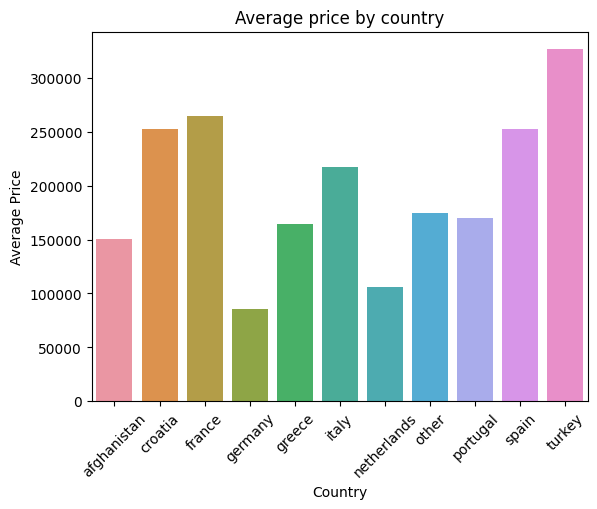

In [29]:
price_by_country = df.groupby('new_country')['price'].mean().reset_index()

sns.barplot(x='new_country', y='price', data=price_by_country)
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.title('Average price by country')
plt.xticks(rotation=45)
plt.show();

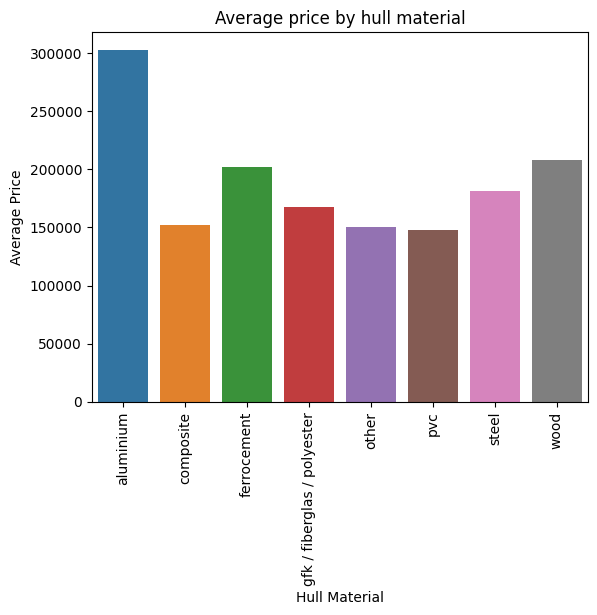

In [30]:
price_by_hull_material = df.groupby('hull_material')['price'].mean().reset_index()

sns.barplot(x='hull_material', y='price', data=price_by_hull_material)
plt.xlabel('Hull Material')
plt.ylabel('Average Price')
plt.title('Average price by hull material')
plt.xticks(rotation=90)
plt.show();

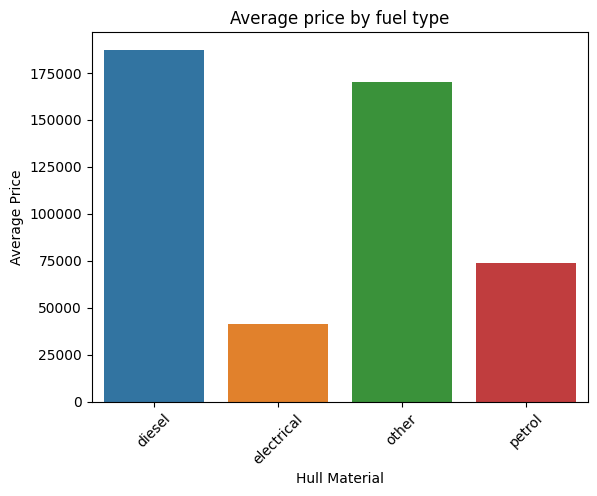

In [31]:
price_by_fuel_type = df.groupby('fuel_type')['price'].mean().reset_index()

sns.barplot(x='fuel_type', y='price', data=price_by_fuel_type)
plt.xlabel('Hull Material')
plt.ylabel('Average Price')
plt.title('Average price by fuel type')
plt.xticks(rotation=45)
plt.show();

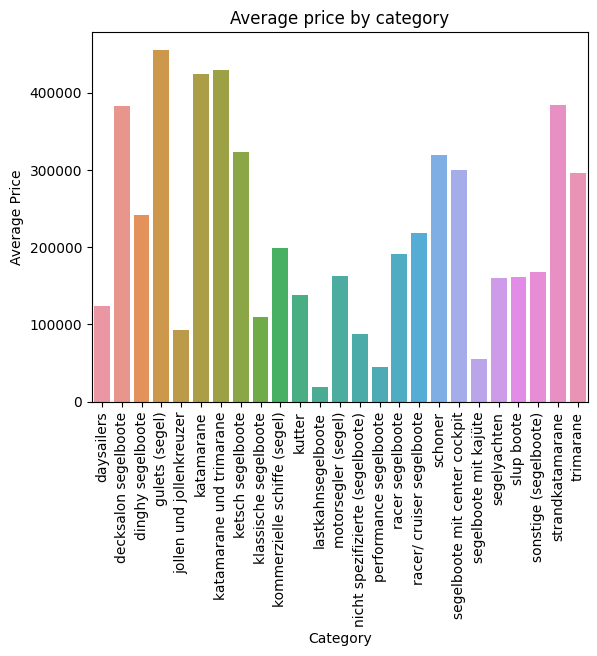

In [32]:
price_by_category = df.groupby('category')['price'].mean().reset_index()

sns.barplot(x='category', y='price', data=price_by_category)
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average price by category')
plt.xticks(rotation=90)
plt.show();

# Text Data

In [33]:
#word count
df['word_count'] = df['description'].apply(lambda x: len(re.findall(r'\w+', x)))

In [34]:
df['word_count'].mean()

215.7183783783784

In [35]:
df['word_count'].describe()

count    1850.000000
mean      215.718378
std       329.561411
min         2.000000
25%        56.000000
50%       138.000000
75%       257.750000
max      5622.000000
Name: word_count, dtype: float64

In [36]:
df = df[df['word_count'] > 20]

In [37]:
df.shape

(1592, 18)

In [38]:
df[df['word_count'] == df['word_count'].min()].description

48      now available for inspections in southern turk...
98      sertral 72, plan mauric, professional boat com...
618     there is some deferred maintenance\n\n\nriggin...
741     sailboat ready to buoy\n3 cabins: 1 double in ...
825     2001 beneteau oceanis 411,\nxboat ref 2061.boa...
895     - teak cockpit - minimalist arm with maneuvers...
1426    mainsail as new doyle/raudaschl (high-tech 17m...
1528    1928 cn corcelle st tropez pointu,\nxboat ref ...
1698    price is a basis for negotiation underwater sh...
Name: description, dtype: object

In [39]:
df[df['word_count'] == df['word_count'].max()].description[588]

' secondo proprietario, mai charter. buono stato generale. posto barca disponibile. ce first 44.7 est une 2eme main, jamais loué. trés bon état général. place de port disponible. instruments vhf raymarine, eco raymarine, autopilota raymarine, log, gps raymarine, stazione vento raymarine, batterie 3. • elica tripala abbatibile a passo variabile. interni/interiors cabine 3, cuccette 6 + 2, bagni 2, wc marini, doccia 2 + 1, cucina 2 fuochi, forno, frigo, boiler. more the feedback provided by over 550 owners of the first 40.7 has been instrumental for farr yacht design and the bénéteau design team to create the new beneteau first 44.7. the first 40.7, designed by the same team, is a world best seller with a record of race titles, including an ims world championship. her success is not due to race results alone. the 40.7 offers rare versatility, outstanding value, and consistently high resale value as will the new beneteau first 44.7 additional description • this version of the accommodatio

In [40]:
df['description_language'] = df['description'].apply(lambda x:detect(x))

In [41]:
df['description_language'].value_counts()

description_language
en    1534
fr      22
it      16
nl      10
de       4
es       3
pl       1
hu       1
ca       1
Name: count, dtype: int64

In [42]:
df = df[df['description_language'] == 'en']

In [43]:
df['description'] = df['description'].str.replace('show more', '')

In [44]:
df.head()

,name,price,location,offerer,id,description,year,manufacturer,model,category,length,fuel_type,hull_material,hull_shape,country,before_2000,new_country,word_count,description_language
0,1976 ketch baarda zeegrundel1976 ketch baarda ...,24500.0,"dinteloord, niederlande",sealion yachts,8222682,general: the zeegrundel was originally designe...,1976,ketch,baarda zeegrundel,lastkahnsegelboote,21.9525,diesel,steel,NaN,netherlands,True,netherlands,390,en
1,1979 dufour 28001979 dufour 2800,9900.0,"greifswald, deutschland",privater verkäufer,8457402,selling a well-preserved and equipped sailing ...,1979,dufour,2800,segelboote mit kajüte,21.9525,diesel,gfk / fiberglas / polyester,NaN,germany,True,germany,326,en
2,2010 van der graaf classic schooner2010 van de...,563250.0,"contact de valk antibes, frankreich",de valk group b.v,7936534,model: van der graaf classic schooner type: sa...,2010,van der graaf,classic schooner,slup boote,21.9525,diesel,steel,NaN,france,False,france,220,en
3,2010 custom van der graaf bv schooner2010 cust...,563250.0,"imperia, italien",bernard gallay yacht brokerage,6751543,price on application\n \nthe current atlantic ...,2010,custom,van der graaf bv schooner,schoner,21.9525,diesel,steel,NaN,italy,False,italy,298,en
4,2008 custom build gulet2008 custom build gulet,563250.0,türkei,gino group,469955,a beautiful 43m gulet classic luxury style bui...,2008,custom build,gulet,segelyachten,21.9525,diesel,wood,NaN,turkey,False,turkey,50,en


In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True